In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bogere\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bogere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bogere\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [3]:
data = pd.read_csv(r"C:\Users\Bogere\OneDrive\Desktop\Text Data\tripadvisor_hotel_reviews.csv")
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [4]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [5]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

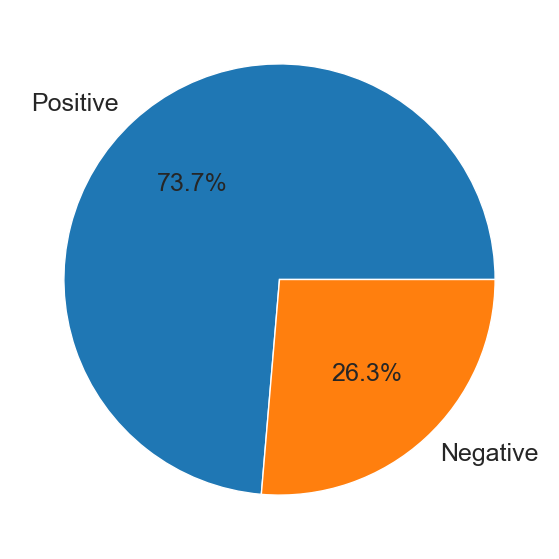

In [6]:
data['Rating'] = data['Rating'].apply(ratings)
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [7]:
lenght = len(data['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


In [8]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281
5,love monaco staff husband stayed hotel crazy w...,Positive,1002
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748
7,"excellent staff, housekeeping quality hotel ch...",Positive,597
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419
9,excellent stayed hotel monaco past w/e delight...,Positive,271


In [9]:
#Number of words in a review
word_count = data['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [10]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [11]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35


In [12]:
#Average length of words
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,6.470149
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,6.396040
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,6.011765
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,6.084746
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,6.714286


In [13]:
#Average length of the sentences in the review
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['Review'][0])])

591.0

In [14]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571,1279.0
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,6.470149,1000.0
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,6.396040,746.0
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,6.011765,595.0
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,6.084746,417.0
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,6.714286,269.0


In [15]:

def visualize(col):
    plt.subplot(1,2,1)
    sns.boxplot(x=data['Rating'], y=data[col])
    plt.xlabel('Rating')
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data=data, x=col, hue='Rating')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.show()


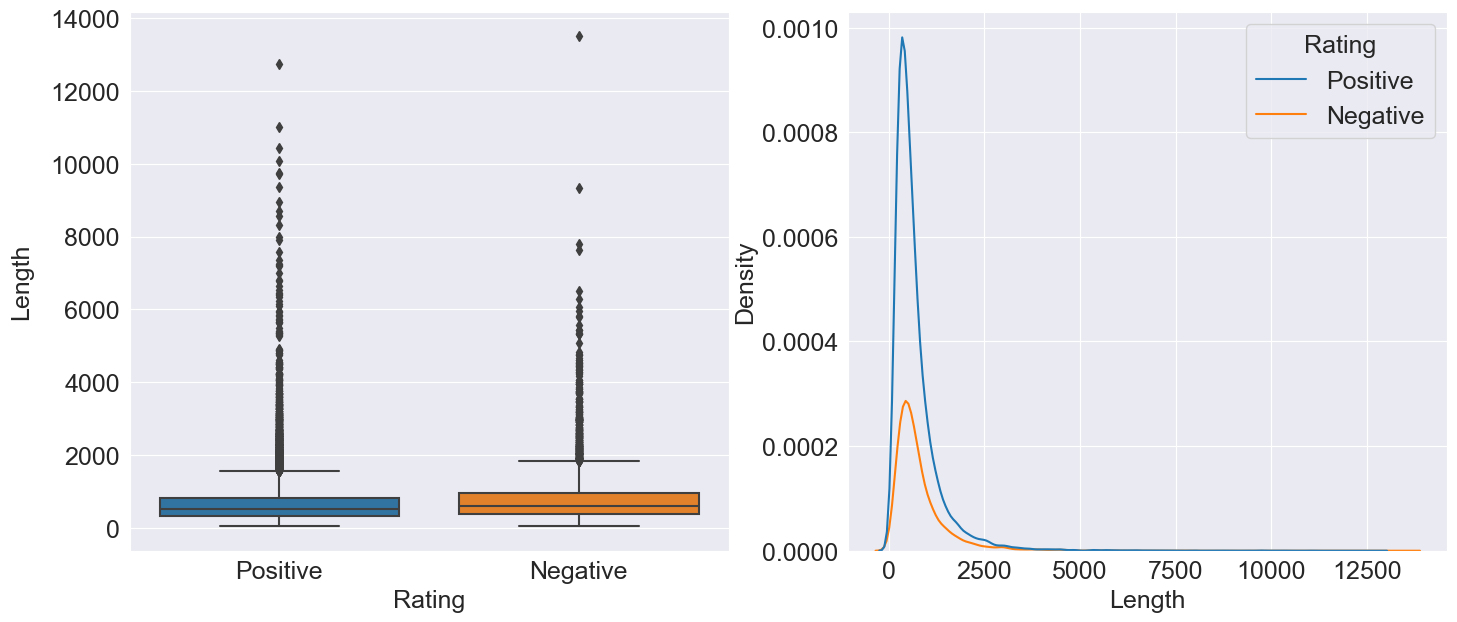

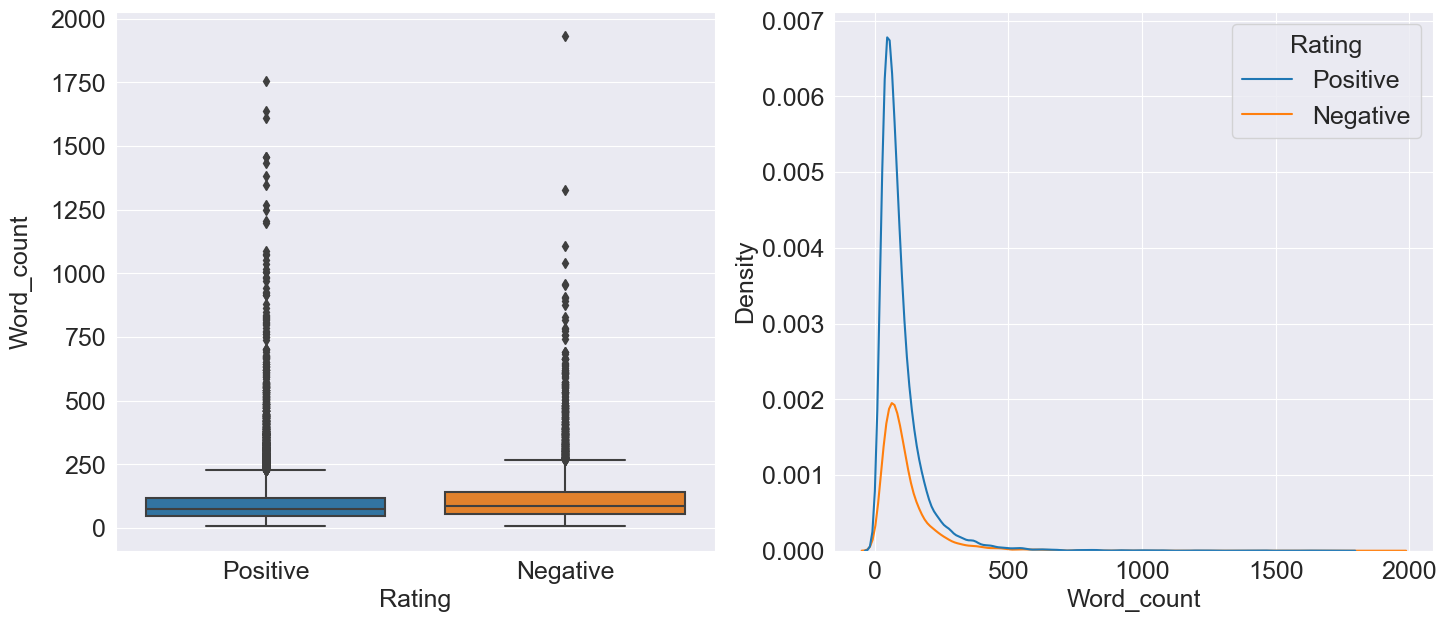

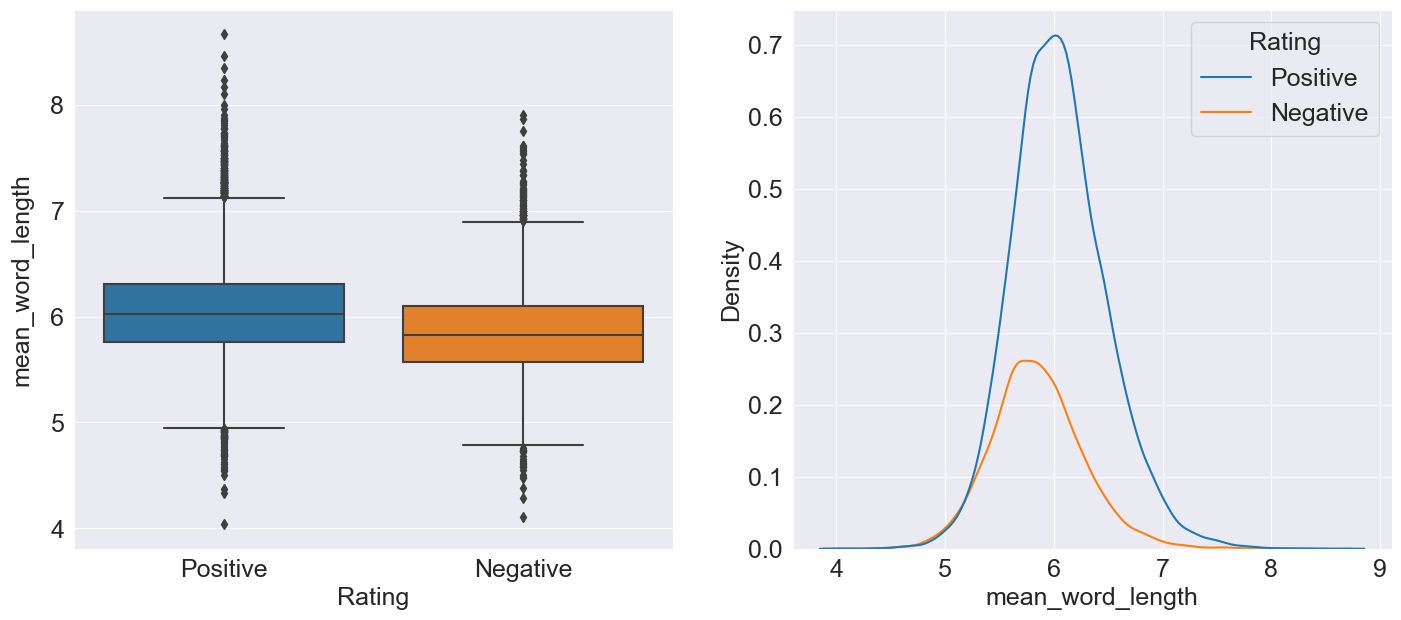

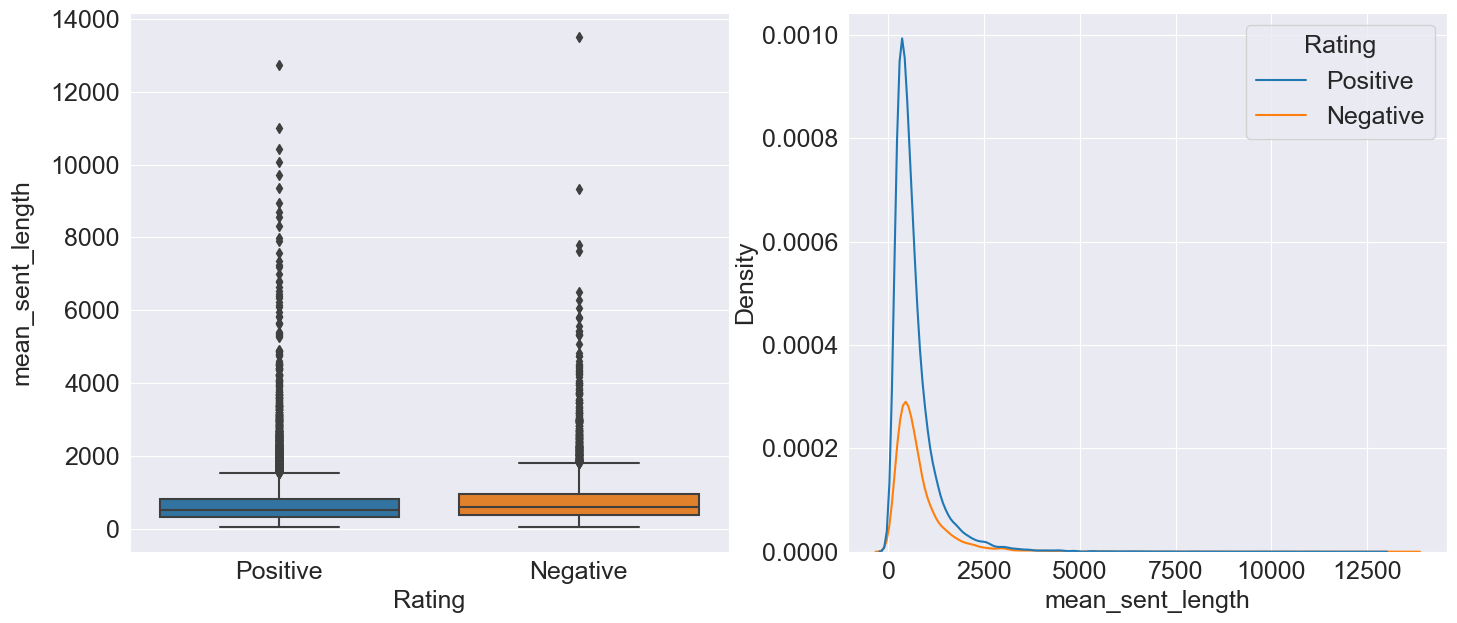

In [16]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [17]:
#Term Frequency Analysis
df = data.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [19]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [20]:
df['Review'] = df['Review'].apply(clean)
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive
5,love monaco staff husband stayed hotel crazy w...,Positive
6,cozy stay rainy city husband spent 7 nights mo...,Positive
7,excellent staff housekeeping quality hotel cho...,Positive
8,hotel stayed hotel monaco cruise rooms generou...,Positive
9,excellent stayed hotel monaco past delight rec...,Positive


In [21]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [22]:
def corpus(text):
    text_list = text.split()
    return text_list

In [23]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,Positive,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,excellent staff housekeeping quality hotel cho...,Positive,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise rooms generou...,Positive,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past delight rec...,Positive,"[excellent, stayed, hotel, monaco, past, delig..."


In [24]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

  0%|                                                                                                                       | 0/20491 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 40660.02it/s]


2060911

In [25]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

In [26]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

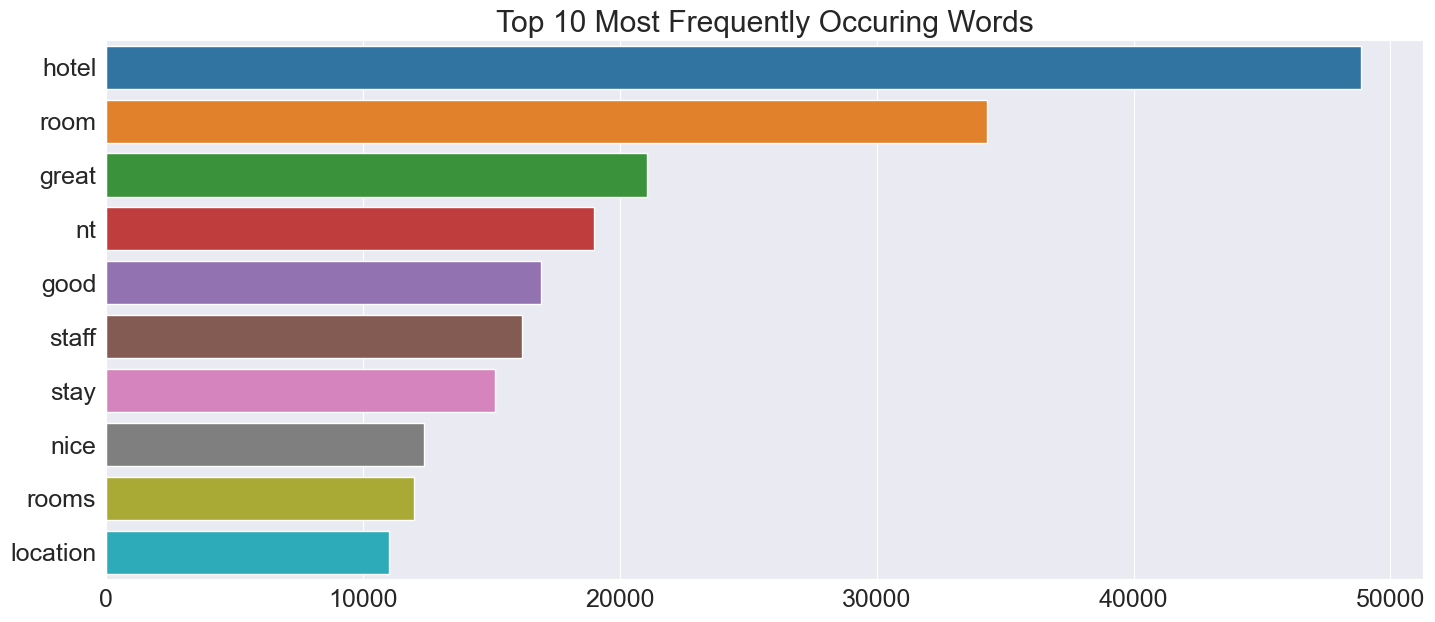

In [27]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [28]:
#Most Frequently occuring N_grams
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

In [31]:
count_values = bigrams.sum(axis=0).A1
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

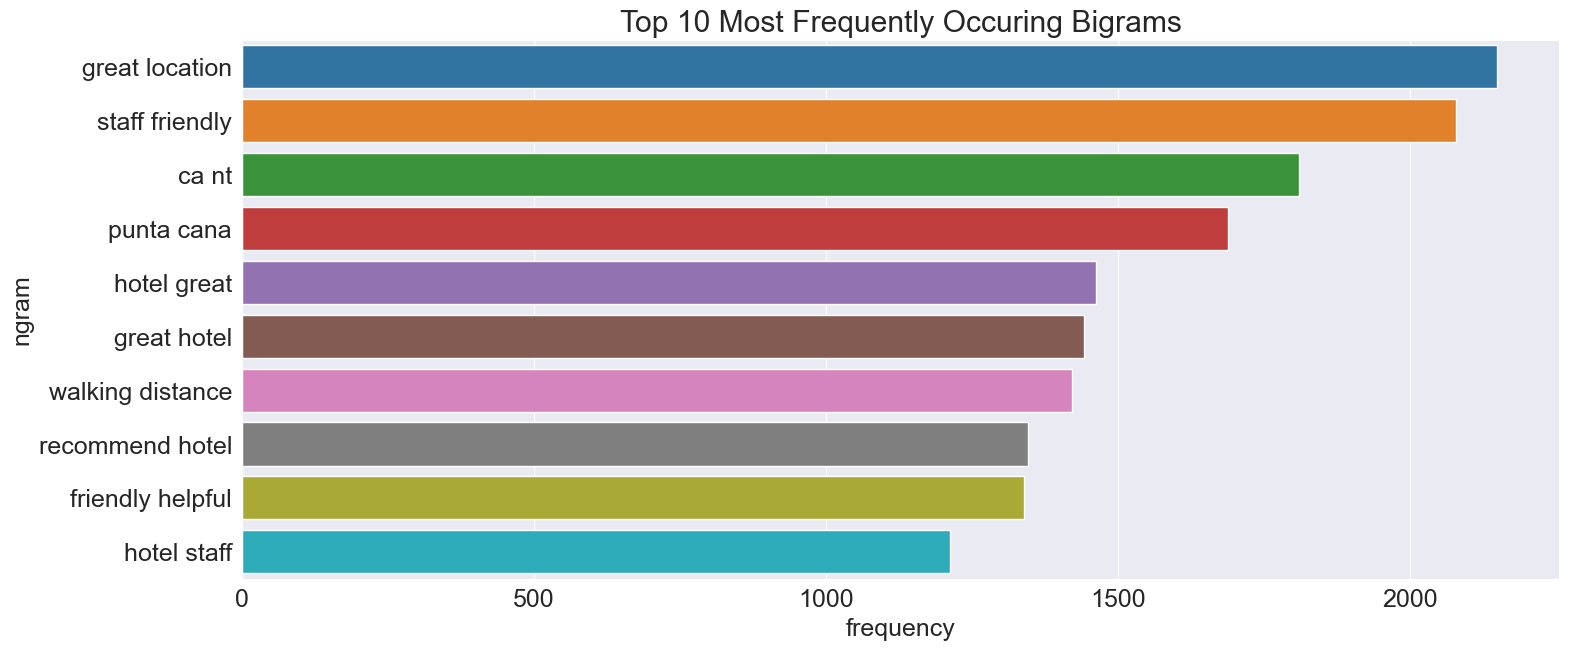

In [32]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [34]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.sum(axis=0).A1
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

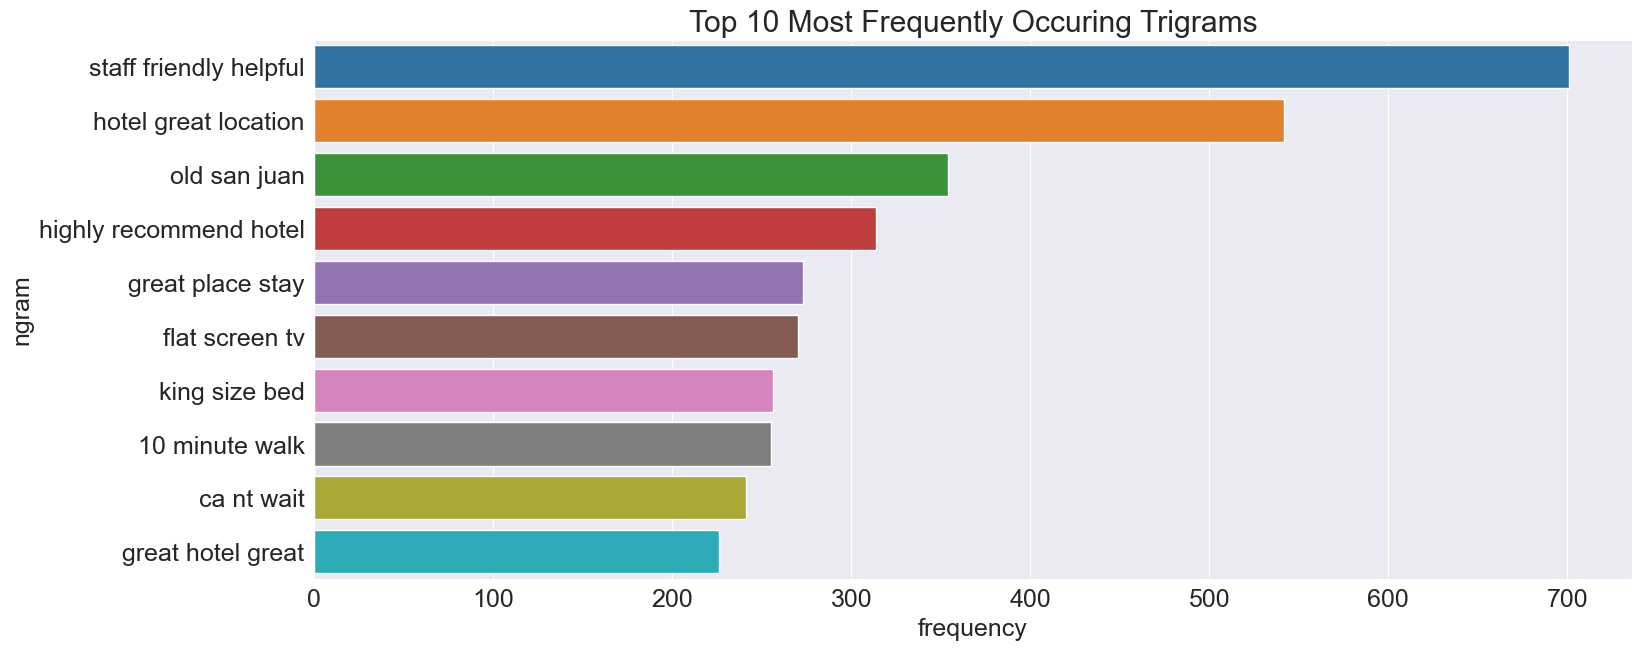

In [35]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()